In [203]:
# Sample API
import numpy
import flowx
import simulation
from matplotlib import pyplot
flowx.__version__

'0.1.dev'

In [256]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar', 'rvar', 'eror']

# Define boundary condition for the poisson test
user_bc = 'neumann'

# Define boundary conditions for variable ivar
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
bc_val  = {'ivar': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
grid = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type, user_bc_val=bc_val)

In [257]:
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

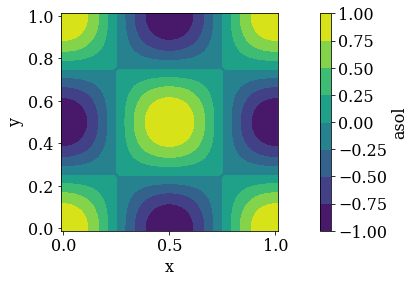

In [258]:

# Plot the analytical solution
flowx.io.plot_contour(grid, 'asol')

In [259]:
# Calculate the right-hand side of the Poisson system
simulation.get_rhs(grid, 'rvar', user_bc)

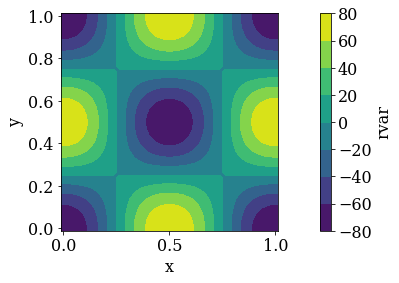

In [260]:
# Plot the right-hand side of the Poisson system
flowx.io.plot_contour(grid, 'rvar')

In [261]:
# Solve the Poisson system
import time
start_time = time.time()
ites, res = flowx.poisson.solve_jacobi(grid, 'ivar', 'rvar',
                                         maxiter=10000, tol=1e-9, verbose=True)
print("--- %s seconds ---" % (time.time() - start_time))

Jacobi method:
- Number of iterations: 1267
- Final residual: 9.976258784260708e-10
--- 0.06950783729553223 seconds ---


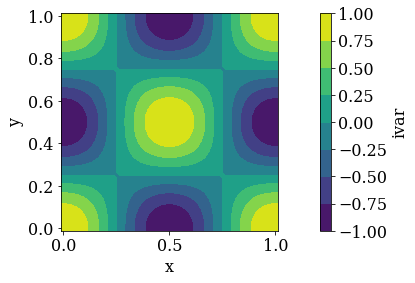

In [262]:
# Plot the numerical solution
flowx.io.plot_contour(grid, 'ivar')

In [263]:
# Compute the error (absolute value of the difference)
grid.get_error('eror', 'ivar', 'asol')

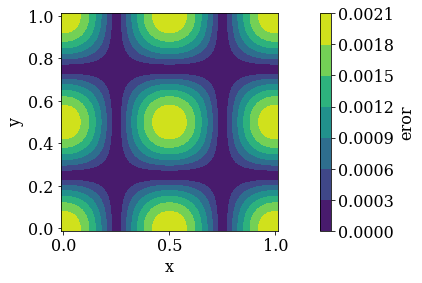

In [264]:
# Plot the error
flowx.io.plot_contour(grid, 'eror')

In [265]:
# Compute the L2-norm of the error.
l2_norm = grid.get_l2_norm('eror')

In [266]:
l2_norm

2.565920709876027e-05

In [267]:
import time
start_time = time.time()
flowx.poisson.solve_gauss_seidel(grid, 'ivar', 'rvar', maxiter=3000, tol=1e-9, verbose=True);
print("--- %s seconds ---" % (time.time() - start_time))

Gauess Seidel:
- Number of iterations: 16
- Final residual: 9.898038082761685e-10
--- 0.05118894577026367 seconds ---


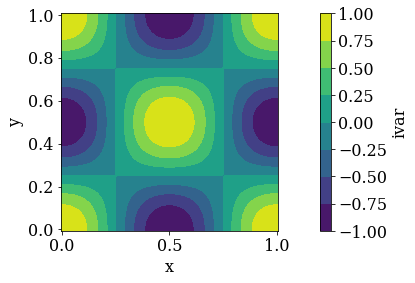

In [155]:
flowx.io.plot_contour(grid, 'ivar')

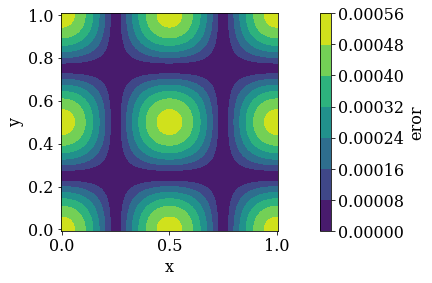

3.2086330687386243e-06

In [156]:
grid.get_error('eror', 'ivar', 'asol')
flowx.io.plot_contour(grid, 'eror')
l2_norm = grid.get_l2_norm('eror')
l2_norm

In [157]:
flowx.poisson.solve_gsor(grid, 'ivar', 'rvar', maxiter=3000, tol=1e-9, verbose=True);

SOR:
- Number of iterations: 43
- Final residual: 9.946352473573847e-10


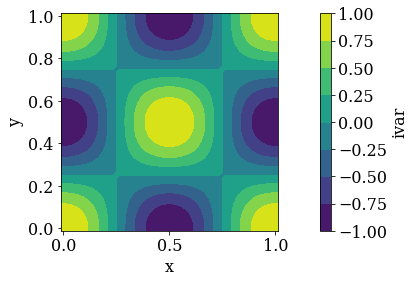

In [142]:
flowx.io.plot_contour(grid, 'ivar');

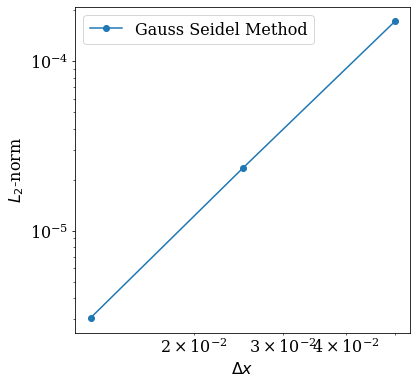

In [269]:
l2_jac = [0.0001716080441178106, 2.565920709876027e-05, 3.055199326323228e-06]
l2_gs  = [0.00017160837731514515, 2.3354681126775248e-05, 3.055199326323228e-06]
points = [1/20, 1/40, 1/80]
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('$L_2$-norm')
#pyplot.loglog(points,l2_jac, marker='o', label='Jacobi Method')
pyplot.loglog(points,l2_gs,marker='o', label='Gauss Seidel Method')
pyplot.legend()
pyplot.savefig('GS.png')

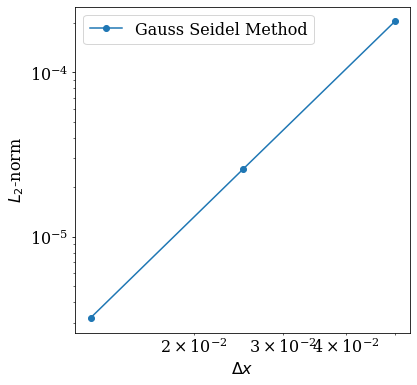

In [270]:
l2_jac = [0.0002040909940489424, 2.335382359997525e-05, 3.2076634992022105e-06]
l2_gs  = [0.00020409110455894564, 2.5659596123581046e-05, 3.2086330687386243e-06]
points = [1/20, 1/40, 1/80]
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('$L_2$-norm')
#pyplot.loglog(points,l2_jac, marker='o', label='Jacobi Method')
pyplot.loglog(points,l2_gs,marker='o', label='Gauss Seidel Method')
pyplot.legend()
pyplot.savefig('GS.png')